In [1]:
.libPaths()

[1] "/disk1/wenqing/anaconda3/envs/wq_R4.2/lib/R/library"

In [4]:
library(ggplot2)

In [4]:
count_reads <- read.table("/disk1/wenqing/intron_retention_analysis_senescence-master/count_reads.txt",header=T)
head(count_reads)

,Gene,feature,rank,position,length,read_counts,read_counts_norm,coverage...
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
1,chr3/NCBP2-AS1/+/1,exon,1,chr3:196666747-196666995:+,248,0,0,0
2,chr3/NCBP2-AS1/+/1,intron,2,chr3:196666995-196667841:+,846,0,0,0
3,chr3/NCBP2-AS1/+/1,exon,3,chr3:196667841-196668013:+,172,0,0,0
4,chr3/NCBP2-AS1/+/1,intron,4,chr3:196668013-196669263:+,1250,0,0,0
5,chr3/NCBP2-AS1/+/1,exon,5,chr3:196669263-196669405:+,142,0,0,0
6,chr3/FGF12-AS2/+/1,exon,1,chr3:192232810-192233297:+,487,0,0,0


In [1]:
all_intron_with_IRI_nums <- c()
for(read_counts_threshod in seq(1,10)){
    dat <- read.csv(paste0("/disk1/wenqing/intron_retention_analysis_senescence-master/result/result_",read_counts_threshod,"_1.csv"))
    intron_with_IRI_num <- table(dat$iri!=Inf)[2]

    all_intron_with_IRI_nums <- c(all_intron_with_IRI_nums,intron_with_IRI_num)
}


In [16]:
stats_dat <- data.frame(
  read_count_threshold = seq(1,10),
  intron_with_IRI_num = all_intron_with_IRI_nums
)
stats_dat$read_count_threshold <- as.factor(stats_dat$read_count_threshold)

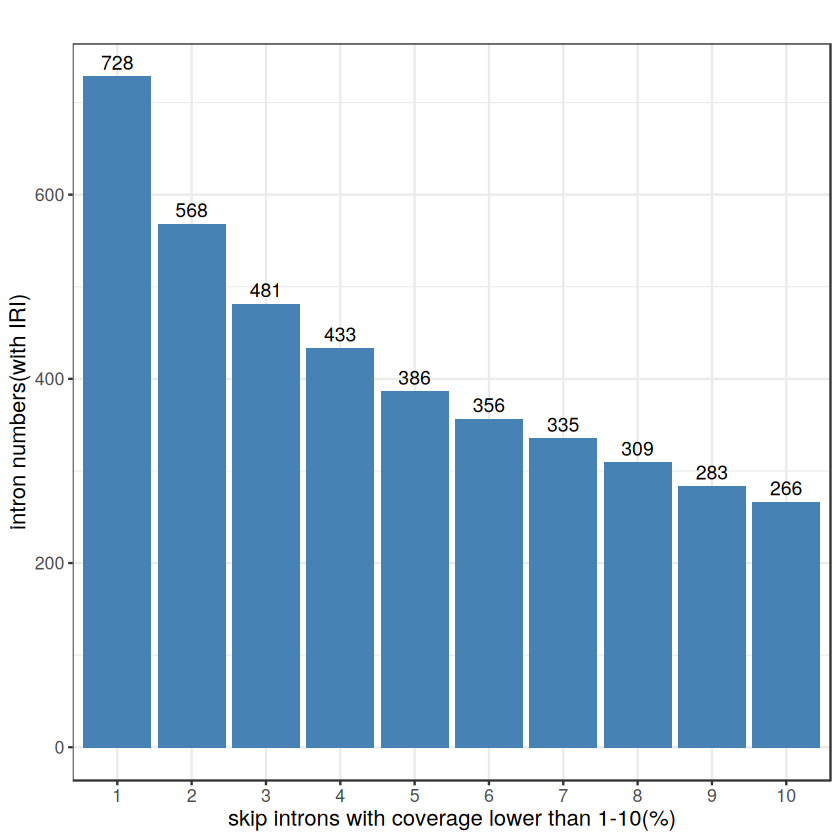

In [17]:
p <- ggplot(stats_dat, aes(x = read_count_threshold, y = intron_with_IRI_num)) +  # 修正了变量名中的拼写错误
  geom_col(fill = "steelblue") +
  theme_bw() +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(hjust = 0.5),
    text = element_text(size = 13)
  ) +
  labs(
    title = "",
    x = "skip introns with coverage lower than 1-10(%)",
    y = "intron numbers(with IRI)"
  ) +
  geom_text(aes(label = intron_with_IRI_num), vjust = -0.5, size = 4)

p + scale_x_discrete(labels = as.character(1:10))  # 确保x轴是离散的，并应用指定标签